In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
import yfinance as yf
df = yf.download('TSLA', period = '1y', interval = '5d')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-25,550.059998,574.000000,545.369995,574.000000,574.000000,48930200.0
2020-11-30,602.210022,607.799988,554.510010,567.599976,567.599976,63003100.0
2020-12-10,574.369995,627.750000,566.340027,627.070007,627.070007,67083200.0
2020-12-15,643.280029,646.900024,623.799988,633.250000,633.250000,45223600.0
2020-12-21,666.239990,668.479980,651.200623,661.242920,661.242920,42937205.0


In [4]:
import fbprophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


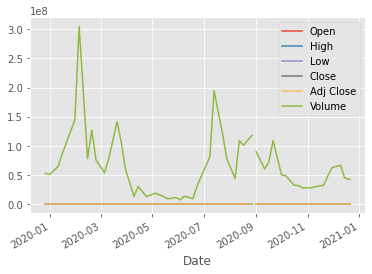

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()
plt.show();

In [10]:
df.reset_index(inplace = True)
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

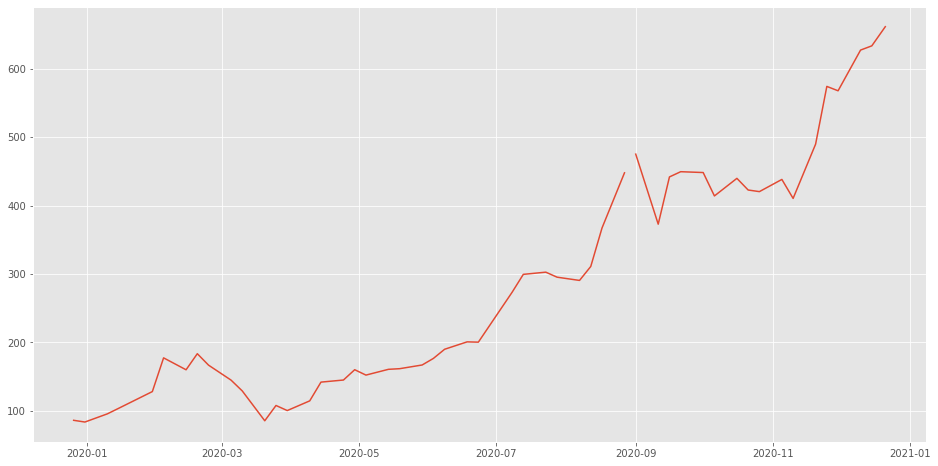

In [13]:
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'],label='Close Price History');

In [18]:
data_to_use = df.filter(['Date','Adj Close'])

In [19]:
data_to_use

,Date,Adj Close
Date,,
2019-12-26,2019-12-26,86.188004
2019-12-31,2019-12-31,83.666000
2020-01-10,2020-01-10,95.629997
2020-01-15,2020-01-15,103.699997
2020-01-30,2020-01-30,128.162003
...,...,...
2020-11-25,2020-11-25,574.000000
2020-11-30,2020-11-30,567.599976
2020-12-10,2020-12-10,627.070007


In [20]:
# prepare expected column names prophet needs to use ds as date and y as op
data_to_use.columns = ['ds','y']

In [21]:
#changing to date time
data_to_use['ds'] = pd.to_datetime(data_to_use['ds'])

In [22]:
data_to_use.columns

Index(['ds', 'y'], dtype='object')

In [23]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [24]:
model = Prophet()

In [25]:
model.fit(data_to_use)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [27]:
data_to_use=data_to_use.sort_values('ds',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')

In [28]:
#Create future dates of 365
future_dates = model.make_future_dataframe(periods=35)

In [29]:
future_dates.tail()

,ds
82,2021-01-21
83,2021-01-22
84,2021-01-23
85,2021-01-24
86,2021-01-25


In [30]:
prediction = model.predict(future_dates)

In [34]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-26,45.113093,36.477152,135.596037,45.113093,45.113093,42.477361,42.477361,42.477361,42.477361,42.477361,42.477361,0.0,0.0,0.0,87.590454
1,2019-12-31,48.471520,39.995278,140.547604,48.471520,48.471520,37.950184,37.950184,37.950184,37.950184,37.950184,37.950184,0.0,0.0,0.0,86.421704
2,2020-01-10,55.188375,19.976309,128.434294,55.188375,55.188375,18.146723,18.146723,18.146723,18.146723,18.146723,18.146723,0.0,0.0,0.0,73.335098
3,2020-01-15,58.546802,44.168018,143.897208,58.546802,58.546802,37.596431,37.596431,37.596431,37.596431,37.596431,37.596431,0.0,0.0,0.0,96.143232
4,2020-01-30,68.622084,58.240653,162.952612,68.622084,68.622084,42.477361,42.477361,42.477361,42.477361,42.477361,42.477361,0.0,0.0,0.0,111.099444


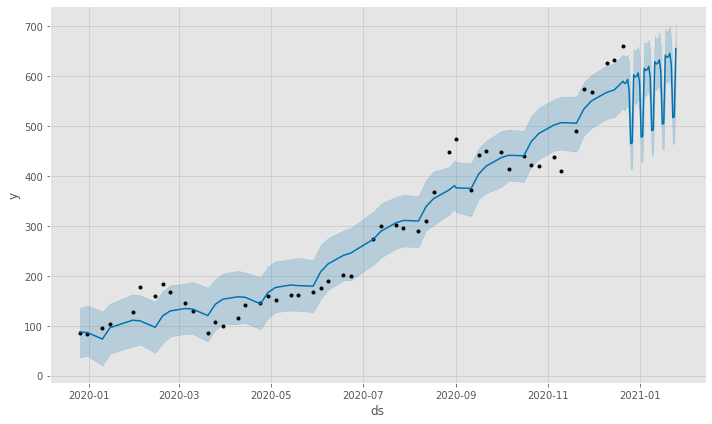

In [35]:
model.plot(prediction);

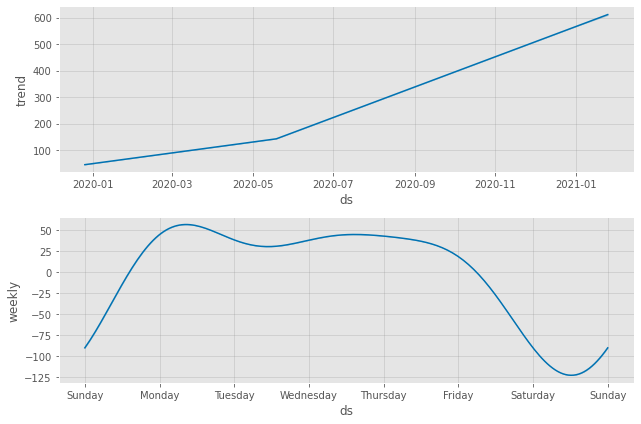

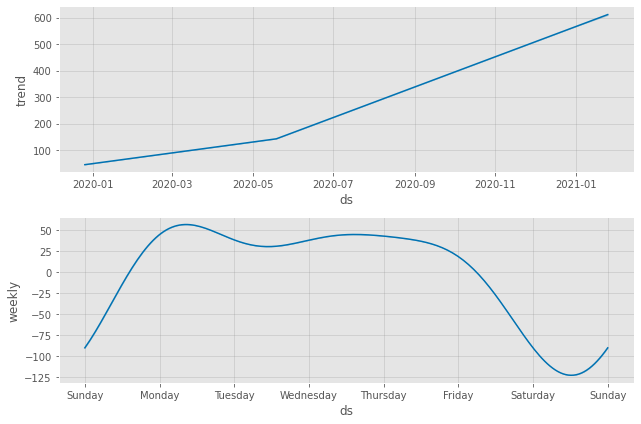

In [36]:
#Weekly, daywise
model.plot_components(prediction)

In [37]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='18 days', horizon = '65 days')
df_cv.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 2020-02-08 00:00:00 and 2020-10-17 00:00:00
100%|██████████| 15/15 [00:18<00:00,  1.27s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-14,163.485988,149.708279,177.180555,160.005997,2020-02-08
1,2020-02-19,171.556860,157.818612,184.460102,183.483994,2020-02-08
2,2020-02-24,87.153779,72.847922,100.484625,166.757996,2020-02-08
3,2020-03-05,208.957205,195.925580,222.772606,144.908005,2020-02-08
4,2020-03-10,232.317625,218.484967,246.261371,129.065994,2020-02-08


In [38]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,4605.218290,67.861759,50.522072,0.232205,0.172877,0.500000
1,8 days,5194.481959,72.072755,53.638633,0.253296,0.172877,0.452381
2,9 days,4737.545189,68.829828,49.951162,0.223191,0.172877,0.500000
3,10 days,5019.101773,70.845619,52.342353,0.226394,0.155906,0.523810
4,11 days,5527.303611,74.345838,55.027998,0.227920,0.196972,0.523810


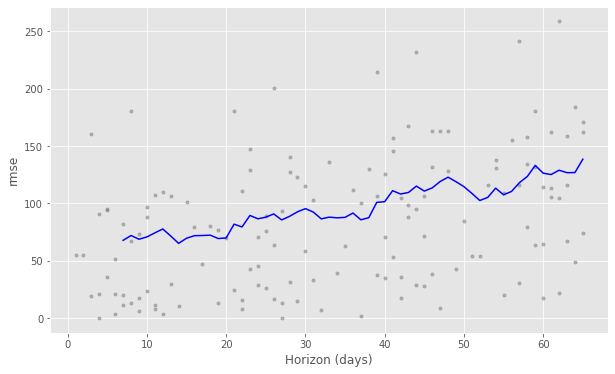

In [39]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [40]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,7 days,4605.218290,67.861759,50.522072,0.232205,0.172877,0.500000
1,8 days,5194.481959,72.072755,53.638633,0.253296,0.172877,0.452381
2,9 days,4737.545189,68.829828,49.951162,0.223191,0.172877,0.500000
3,10 days,5019.101773,70.845619,52.342353,0.226394,0.155906,0.523810
4,11 days,5527.303611,74.345838,55.027998,0.227920,0.196972,0.523810
...,...,...,...,...,...,...,...
54,61 days,15678.169436,125.212497,113.102287,0.439808,0.343136,0.119048
55,62 days,16638.567027,128.990570,113.301520,0.415858,0.376484,0.142857
56,63 days,16087.396215,126.836100,111.085801,0.421932,0.343136,0.142857
57,64 days,16110.767013,126.928196,109.825760,0.424129,0.376484,0.142857
